# MEMS 1029 - AssigAssig 1 - 1 Static Shaft Analysis
*Ziang Cao, ZIC25, University of Pittsburgh*  

# Consider a power transmitting countershaft with a gear reduction

You are given a shaft, supported by two bearings, and carrying two gears.
Gear $A$ receives power from another gear with force $F_A$ applied at a 20° pressure angle.
The power is transmitted through the shaft and delivered through gear $B$.
Gear $B$ transmits force to yet another gear with a force $F_B$ at a 25° pressure angle.

*Given:*
$F_A = 11\,\mathrm{kN}$, $d_A = 600\,\mathrm{mm}$, and $d_B = 300\,\mathrm{mm}$


*copyrighted image not included here*

Begin by importing the relevant Python libraries.
*Matplotlib* is a plotting package used for making graphs, and *numpy* is a scientific computing library.
The syntax for both is somewhat similar to the MATLAB language.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

Next, set the known input variables. I prefer to work in units of "mks" or meter-kilogram-second,
but consistency is the most important factor.

Notice that we call the value of $\pi$  from the numpy library with the command `np.pi`,
and that a pound or hashtag symbol (#) denotes a comment.

In [2]:
T_1 = 150     # N, sub-force applied to gear A
T_2 = 600     # N, sub-force applied to gear A

F_A = abs(T_2-T_1)   # N, force applied to gear A [Only when calculating the F_B]

d_shaft = 0.025     # m, diameter of the whole shaft
d_A = 0.150   # m, pitch diameter of gear A
d_B = 0.200   # m, pitch diameter of gear B

# As np.cos() requires input in radians. We need to convert degree to radians
theta_A = 60.*(np.pi/180.)  # rad, pressure angle of gear A
theta_B = 20.*(np.pi/180.)  # rad, pressure angle of gear B

dist_OA = 0.300  # m, distance from the bearing at the origin to gear A 
dist_OB = 0.700  # m, distance from the bearing at the origin to gear B
dist_OC = 0.850  # m, distance from the bearing at the origin to the bearing at C

## (a) Determine the force on gear B

The first part of the problem asks that we find the value of the force $F_B$
when the shaft is in static equilibrium.
We do this by setting the sum of the moments around the shaft axis (axis $x$)
equal to zero,
$$ F_A = ｜T2-T1｜,$$
$$ \Sigma M_x = (F_A \cos \theta_A ) (d_A / 2) - (F_B \cos \theta_B ) (d_B / 2) = 0,$$
and then solving algebraically for $F_B$ gives us
$$ W = F_B = F_A \cdot \frac{d_A \cos \theta_A}{d_B \cos \theta_B}.$$

Implement in code, and solve for the numerical value.

Notice that a cosine is called with `np.cos(angle_in_radians)`,
and that you can format the `print` statement to report the answer
to an appropriate number of significant figures and in the requested units.

In [3]:
# (a) Determine the force on gear B
F_A = abs(T_2-T_1)
F_B = (F_A*d_A*np.cos(theta_A))/(d_B*np.cos(theta_B))
W = F_B
print('The force acting on gear B is {:.3f} kN'.format(F_B*1e-3))

The force acting on gear B is 0.180 kN


## (b) Find the bearing reaction forces, assuming that the shaft is running at a constant speed.

The reaction forces applied by the bearings at $O$ and $C$ will have components in the $y$ and $z$ directions.
We therefore separate the problem into two planes ($xy$ and $xz$) and solve each of them independently.

We again apply the equations for static equilibrium,
$$ F_A = （T2+T1）,$$
$$ \Sigma F_z = 0 = R_{Oz} - F_A \cos \theta_A + F_B \cos \theta_B + R_{Cz} $$
$$ \Sigma F_y = 0 = R_{Oy} - F_A \sin \theta_A - F_B \sin \theta_B + R_{Cy}$$

and

$$ \Sigma M_y = 0 = F_a \delta_{OA} \cos \theta_A - F_B \delta_{OB} \cos \theta_B - R_{Cz} \delta_{OC}$$
$$ \Sigma M_z = 0 = -F_A \delta_{OA} \sin \theta_A - F_B \delta_{OB} \sin \theta_B - R_{Cy} \delta_{OC}$$

and have a pair of two-equation, two-unknown problems to solve.


We could solve these algebraically, but the `sympy` package in Python can do so for us as well.
Just make sure to update your imports in the cell above to call it.
You could import the library at any time in the code,
but it's good practice to import all  required libraries together at the top.

In [4]:
# (b) Find the bearing reaction forces, assuming the shaft is running at constant speed
def find_bearingReactionForce(F_A = T_1+T_2, F_B=F_B, 
                              theta_A=theta_A, theta_B=theta_B, 
                              dist_OC=dist_OC, dist_OB=dist_OB, dist_OA=dist_OA):
  ## [1] Decalre Symbol
  sym.init_printing()
  R_Oy, R_Oz, R_Cy, R_Cz = sym.symbols('R_Oy,R_Oz,R_Cy,R_Cz')

  ## [2] Decalre equations
  ## on xy-plane:
  # Sum Force in y direction
  eq1 = sym.Eq(R_Oy + F_A*np.sin(theta_A) - F_B*np.sin(theta_B) + R_Cy, 0 )
  # Sum momentum about point O
  eq2 = sym.Eq( F_A*np.sin(theta_A)*dist_OA - F_B*np.sin(theta_B)*dist_OB + R_Cy*dist_OC, 0 )

  ## on xz-plane:
  # Sum Force in z direction
  eq3 = sym.Eq( R_Oz - F_A*np.cos(theta_A) - F_B*np.cos(theta_B) + R_Cz, 0 )
  # Sum momentum abåout point O
  eq4 = sym.Eq( F_A*np.cos(theta_A)*dist_OA + F_B*np.cos(theta_B)*dist_OB - R_Cz*dist_OC, 0 )


  ## [3] Solve
  sol = sym.solve([eq1, eq2, eq3, eq4],(R_Oy,R_Oz,R_Cy,R_Cz))

  ## [4] Print
  print(sol)
  R_Oy = sol[R_Oy]
  R_Oz = sol[R_Oz]
  R_Cy = sol[R_Cy]
  R_Cz = sol[R_Cz]
  return [R_Oy, R_Oz, R_Cy, R_Cz]


In [5]:
[R_Oy, R_Oz, R_Cy, R_Cz] = find_bearingReactionForce(F_A = T_1+ T_2, F_B=W)  # Force in N

{R_Cy: -178.660861092711, R_Oy: -409.438214713196, R_Cz: 271.323529411765, R_Oz: 272.426470588235}


## (c) Draw the shear force and bending moment diagrams for the shaft

You will create four diagrams in total: shear and bending moment in each of the $xy$ and $xy$ planes.
There are certainly more elegant (or more "pythonic") ways to perform the calculation,
but the example below serves the purpose with a series of if-then-else statements.

### General function for plotting
***Note: All the input argument are signed!!!***

#### For Shearing Force

In [6]:
## Shearing Force

def show_inPlane_ShearingForce(isCosine = False, description = 'Vertical',
                              F_A_signed = None, F_B_signed = None, 
                              theta_A = theta_A, theta_B = theta_B,
                              R_O_sub = R_Oy, R_C_sub=R_Cy, 
                              dist_OA=dist_OA, dist_OB=dist_OB, dist_OC=dist_OC):
    # Note: np.sin(in radians)

    x = np.linspace(0, dist_OC, 1000)
    V_xy = np.zeros_like(x)

    if isCosine:
      F_A_equal = F_A_signed * np.cos(theta_A)
      F_B_equal = F_B_signed * np.cos(theta_B)
    else:
      F_A_equal = F_A_signed * np.sin(theta_A)
      F_B_equal = F_B_signed * np.sin(theta_B)

    # return list of pair [index and  value] in an array
    for idx, loc in enumerate(x):
        if loc < dist_OA:
            V_xy[idx] = R_O_sub
        elif ((loc >= dist_OA) and (loc < dist_OB)):
            V_xy[idx] = R_O_sub + F_A_equal
        elif ((loc >= dist_OB) and (loc < dist_OC)):
            V_xy[idx] = R_O_sub + F_A_equal + F_B_equal
        else:
            V_xy[idx] = R_O_sub + F_A_equal + F_B_equal + R_C_sub
        V_xy[0] = 0
    
    text = 'Shearing Force on ' + description +  ' Plane'
    plt.figure()
    plt.title(text)
    plt.plot(1e3*x, 1e-3*V_xy)
    plt.grid(True)
    plt.xlabel('x / mm')
    plt.ylabel('V_shear / kN');
    plt.show()

    return V_xy

#### For Bending Moment

In [7]:
## Bending Moment Diagrams

def show_inPlane_BendingMoment(isCosine = False, description = 'Vertical',
                                F_A_signed = None, F_B_signed = None, 
                                theta_A = theta_A, theta_B = theta_B,
                                R_O_sub = R_Oy, R_C_sub=R_Cy, 
                                dist_OA=dist_OA, dist_OB=dist_OB, dist_OC=dist_OC):
    # Note: np.sin(in radians)

    x = np.linspace(0, dist_OC, 1000)

    M_xy = np.zeros_like(x)

    if isCosine:
      F_A_equal = F_A_signed * np.cos(theta_A)
      F_B_equal = F_B_signed * np.cos(theta_B)
    else:
      F_A_equal = F_A_signed * np.sin(theta_A)
      F_B_equal = F_B_signed * np.sin(theta_B)

    # return list of pair [index and  value] in an array 
    for idx, loc in enumerate(x):
        if loc < dist_OA:
            M_xy[idx] = R_O_sub * loc
        elif ((loc >= dist_OA) and (loc < dist_OB)):
            M_xy[idx] = R_O_sub * loc + F_A_equal*(loc-dist_OA)

        elif ((loc >= dist_OB) and (loc < dist_OC)):
            M_xy[idx] = (
                R_O_sub * loc + F_A_equal*(loc - dist_OA) 
                + F_B_equal*(loc - dist_OB)
            )
        else:
           M_xy[idx] = (
                R_O_sub * loc + F_A_equal*(loc-dist_OA) 
                + F_B_equal*(loc - dist_OB) + R_C_sub*(loc-dist_OC)
           )
        M_xy[0] = 0
    
    
    text = 'Bending Moment on ' + description +  ' Plane'
    plt.figure()
    plt.title(text)
    plt.plot(1e3*x, 1e-3*M_xy)
    plt.grid(True)
    plt.xlabel('x / mm')
    plt.ylabel('M_bending / N*m');
    plt.show()
#     plt.close()
    
    return M_xy

### 1.On Vertical (xy) plane


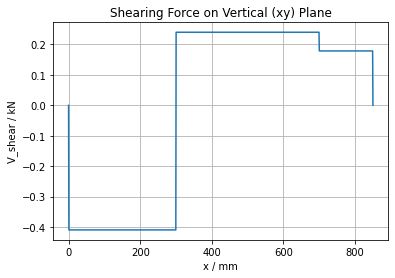

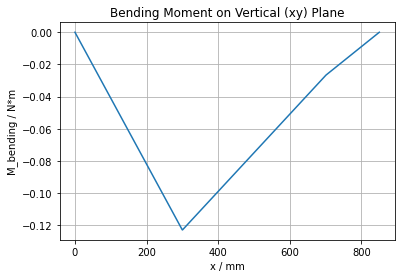

In [8]:
# Shearing Force
V_xy = show_inPlane_ShearingForce(isCosine = False, description = 'Vertical (xy)',
                            # here F_B_signed = -F_B [As ppointing to negative y-direction]
                            F_A_signed = T_1+T_2, F_B_signed = -F_B, 
                            theta_A = theta_A, theta_B = theta_B,
                            R_O_sub = R_Oy, R_C_sub = R_Cy, 
                            dist_OA=dist_OA, dist_OB=dist_OB, dist_OC=dist_OC)

# Bending Moment
M_xy = show_inPlane_BendingMoment(isCosine = False, description = 'Vertical (xy)',
                            # here F_B_signed = -F_B [As ppointing to negative y-direction]
                            F_A_signed = +(T_1+T_2), F_B_signed = -F_B, 
                            theta_A = theta_A, theta_B = theta_B,
                            R_O_sub = R_Oy, R_C_sub = R_Cy, 
                            dist_OA=dist_OA, dist_OB=dist_OB, dist_OC=dist_OC)

### 2.On Horizontal (xz) plane


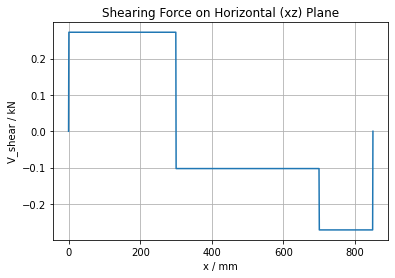

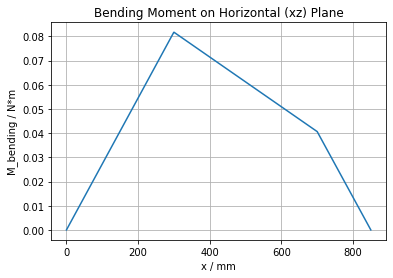

In [9]:
# Shearing Force
V_xz = show_inPlane_ShearingForce(isCosine = True, description = 'Horizontal (xz)',
                            # here F_B_signed = -F_B [As ppointing to negative y-direction]
                            F_A_signed = -(T_1+T_2), F_B_signed = -F_B, 
                            theta_A = theta_A, theta_B = theta_B,
                            R_O_sub = R_Oz, R_C_sub = R_Cz, 
                            dist_OA=dist_OA, dist_OB=dist_OB, dist_OC=dist_OC)

# Bending Moment
M_xz = show_inPlane_BendingMoment(isCosine = True, description = 'Horizontal (xz)',
                            # here F_B_signed = -F_B [As ppointing to negative y-direction]
                            F_A_signed = -(T_1+T_2), F_B_signed = -F_B, 
                            theta_A = theta_A, theta_B = theta_B,
                            R_O_sub = R_Oz, R_C_sub = R_Cz, 
                            dist_OA=dist_OA, dist_OB=dist_OB, dist_OC=dist_OC)

## (d) At the point of maximum beanding moment, determine the bending stress and the torsional shear stress

In [10]:
def report_max_Moment(M_xy, M_xz):
  M_normal = np.sqrt(np.square(M_xy), np.square(M_xz))
  M_max = max(M_normal) # in N*m

  result = np.where(M_normal == M_max)
  index = result[0][0]
  x = np.linspace(0, dist_OC, 1000)
  position = x[index] # in m
  print("M_max: {} N*m, position: {} m".format(M_max, position))
  return [M_max, position]

In [11]:
[M_max, position] = report_max_Moment(M_xy, M_xz)

M_max: 122.74735200820938 N*m, position: 0.30035035035035035 m


In [12]:
import math
def auto_StressReportor_under_Moment(F_A_abs = (T_1+T_2), F_B_abs = F_B, 
                                     M = M_max, position = position,
                                     theta_A = theta_A, theta_B = theta_B):
  if math.isclose(position, dist_OA, rel_tol=5e-3):
    print('Focusing on the shaft near gear A')
    # d = d_A
    F_equal = F_A_abs * np.cos(theta_A)
  elif math.isclose(position, dist_OB, rel_tol=5e-3):
    print('Focusing on the shaft near gear B')
    # d = d_B
    F_equal = F_B_abs * np.cos(theta_B)
  else:
    print('Unable to be reported in automatic way')
    return [None, None]
  d = d_shaft
  
  segma_max = (32*M)/(np.pi * (d**3))
  segma_max *= 1e-6 # convert into MPa

  T = F_equal * (d/2)
  tao_max =  (16*T)/(np.pi * (d**3))
  tao_max *= 1e-6 # convert into MPa
  
  # message = "The bending stress: {} MPa \nThe torsional shear stress: {} MPa".format(segma_max, tao_max)

  message = "The bending stress: {} MPa \n".format(segma_max)
  message += "The torsional shear stress: {} MPa".format(tao_max)
  print(message)

  return [segma_max, tao_max]


In [13]:
[segma_max, tao_max] = auto_StressReportor_under_Moment()

Focusing on the shaft near gear A
The bending stress: 80.01883268525016 MPa 
The torsional shear stress: 1.5278874536821951 MPa


## (e) At the point of maximum bending moment, determine the principal stresses and the maximum shear stress

In [14]:
# Note: I still confused on how to figuring segma_x segma_y from the figure.
def report_principal_stress_and_shear(segma_x, segma_y, tao_xy):
    segma_avg = ((segma_x + segma_y) / 2)
    a = abs((segma_x - segma_y) / 2)
    b = tao_xy
    R = math.sqrt(pow(a, 2) + pow(b, 2))
    # print(segma_avg)
    # print(R)
    segma_1 = segma_avg + R
    segma_2 = segma_avg - R
    
    shear_max = R

    message = "At the point of maximum bending moment\n"
    message += "The principal stress are: {} and {} MPa \n".format(segma_1, segma_2)
    message += "The maximum shear stress: {} MPa".format(shear_max)
    print(message)
    
    return [segma_1, segma_2, shear_max]

In [15]:
[segma_1, segma_2, shear_max] = report_principal_stress_and_shear(segma_x=segma_max, segma_y=0, tao_xy=tao_max)

At the point of maximum bending moment
The principal stress are: 80.04799568990755 and -0.02916300465739141 MPa 
The maximum shear stress: 40.03857934728247 MPa
